# Clustering

En este _notebook_ vamos a estudiar los siguientes métodos de _clustering_:

- K-means
- DBSCAN
- Clustering jerárquico

Vamos a partir con K-means.

## K-means

Recordemos que este método se basa en computar centroides iteración tras iteración, hasta que se converge a unos _clusters_ fijos. Debemos señalar al principio cuantos _clusters_ estamos buscando.

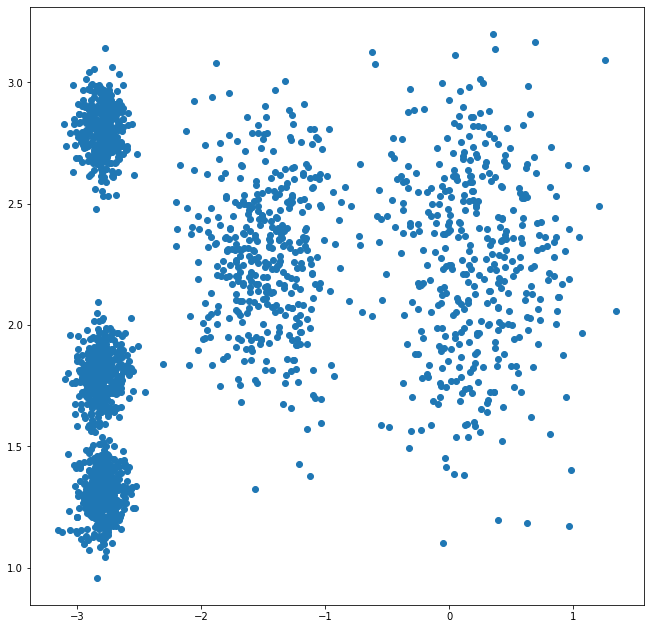

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# Géneramos 5 clusters con el método make_blobs
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.figure(figsize=(11, 11))
plt.scatter(X[:, 0], X[:, 1])

plt.show()

Ahora vamos a clasificarlo con K-means

In [ ]:
# Importamos K-means
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X) # como es aprendizaje no supervisado solo pasamos X

Y así generamos una etiqueta para cada instancia. Vamos a ver cómo quedaron los clusters.

In [ ]:
# Vamos las etiquetas predecidas por el algoritmo K-means
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

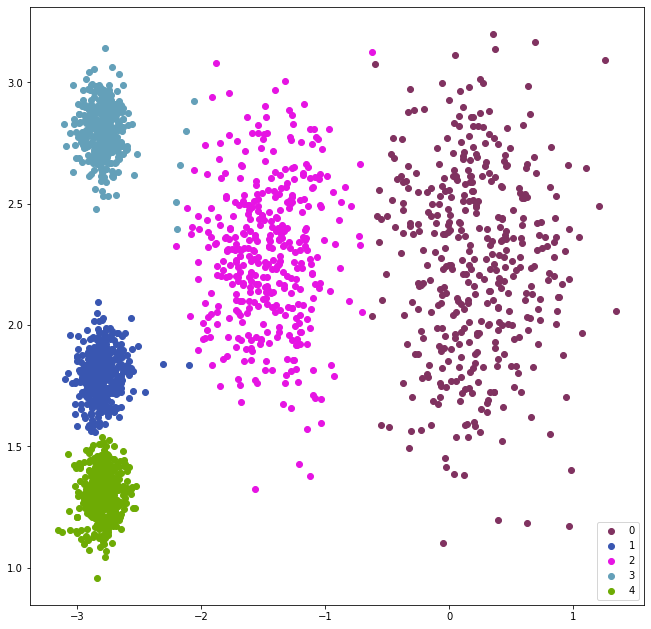

In [ ]:
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04']

plt.figure(figsize=(11, 11))

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c=cmap_bold[4], label='4')

plt.legend()
plt.show()

Como vemos hay un par de clasificaciones de la clase 2 que podemos considerar incorrectas, pero en general el algoritmo hizo un muy buen trabajo. Ojo que para correr K-means indicando el número de inicializaciones con distintos centroides puedes descomentar el código de la línea siguiente.

In [ ]:
# El parámetro es n_init, por defecto es 10
# kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

Podemos ver la inercia.

In [ ]:
kmeans.inertia_

211.5985372581684

Y con esto hacer el método del "codo" para encontrar el número de _clusters_ óptimos.

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

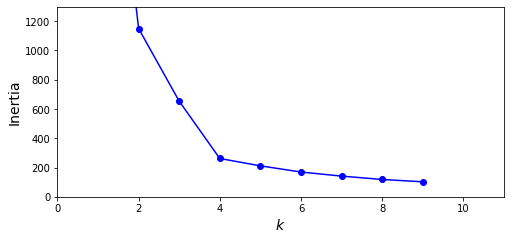

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([0, 11, 0, 1300])
plt.show()

Como vemos, entre desde 4 parece ser una buena elección para el $K$. Notamos que ahí se forma el "codo".

## DBSCAN

Vamos a ver cómo usar el algoritmo DBSCAN con Scikit Learn. Vamos a partir desde el _dataset_ generado por `make_moons`.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Usamos DBSCAN señalando que queremos un epsilon de 0.05 y un minimo de vecindad igual a 5
dbscan = DBSCAN(eps=0.05, min_samples=5)
y_pred = dbscan.fit_predict(X)

In [ ]:
# Vemos los elementos distintos de y
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5,  6])

Vemos que tenemos 7 etiquetas (del 0 al 7). Los -1 son _outliers_. Vamos a graficar el resultado.

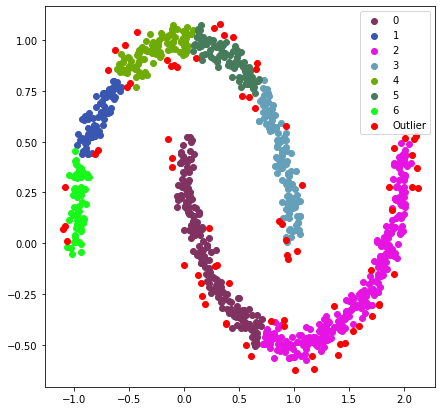

In [ ]:
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', '#467b5c', '#17fa19', '#FF0000']

plt.figure(figsize=(7, 7))

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c=cmap_bold[4], label='4')
plt.scatter(X[y_pred==5, 0], X[y_pred==5, 1], c=cmap_bold[5], label='5')
plt.scatter(X[y_pred==6, 0], X[y_pred==6, 1], c=cmap_bold[6], label='6')
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c=cmap_bold[7], label='Outlier')

plt.legend()
plt.show()

Vamos a ver cómo cambiar para un mayor epsilon.

In [ ]:
# Usamos DBSCAN señalando que queremos un epsilon de 0.2 y un minimo de vecindad igual a 5
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)

In [ ]:
# Vemos los elementos distintos de y
np.unique(y_pred)

array([0, 1])

Ahora tenemos dos elementos, sin _outliers_.

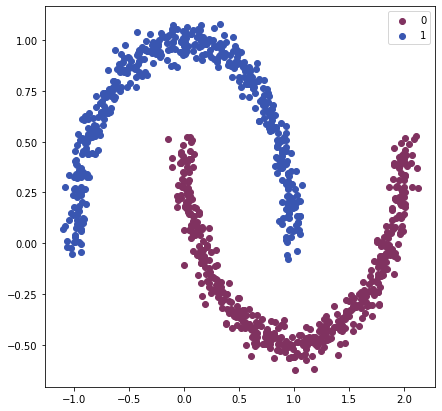

In [ ]:
cmap_bold = ['#803260', '#3956b1']

plt.figure(figsize=(7, 7))

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1')

plt.legend()
plt.show()

Como vemos, este método captura las zonas densas, y como dijimos en clases, funciona bien cuando tenemos zonas densas separadas por zonas poco densas.

## Clustering Jerárquico

Ahora vamos a aprender a hacer _clustering_ jerárquico con Scikit Learn y Scipy. Lo que haremos será construir un dendrograma del _dataset Iris_ (Parte del código fue obtenido [desde este link](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/) y [desde este link](https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py)).

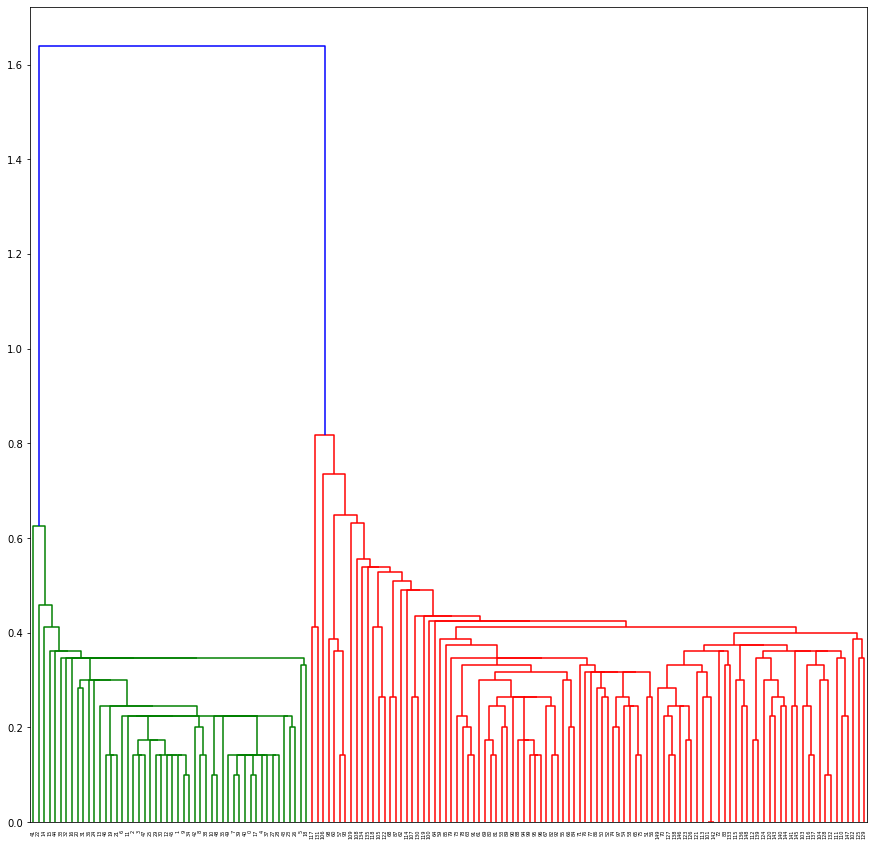

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Dendrograma con Scipy, como lo vimos en clases
iris = load_iris()

X = iris['data']
y = iris['target']

linked = linkage(X, 'single')

plt.figure(figsize=(15, 15))

# A esta función podemos pasarle labels
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Aquí hicimos todo con la librería `scipy`, considerando las distancias euclideanas entre los elementos. Veamos otro ejemplo con Scipy que podemos definir nosotros.

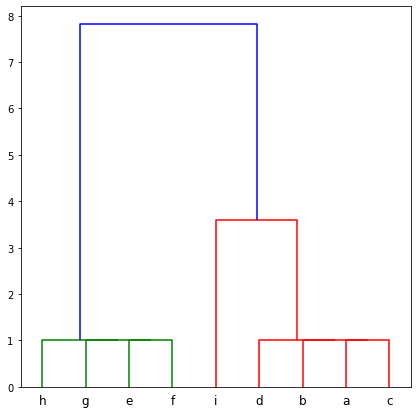

In [ ]:
X = np.array(
[
    [0, 0],
    [1, 1],
    [1, 0],
    [0, 1],
    [9, 9],
    [9, 10],
    [10, 9],
    [10, 10],
    [4, 3]
])

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

linked = linkage(X, 'single')

plt.figure(figsize=(7, 7))

# A esta función podemos pasarle labels
dendrogram(
    linked,
    orientation='top',
    labels=labels,
    distance_sort='descending',
    show_leaf_counts=True
)

plt.show()

Ahora vamos a hacer cómo hacer esto con `AgglomerativeClustering` de Scikit Learn, que hace los cálculos de forma distinta, pero nos ofrece [más opciones](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

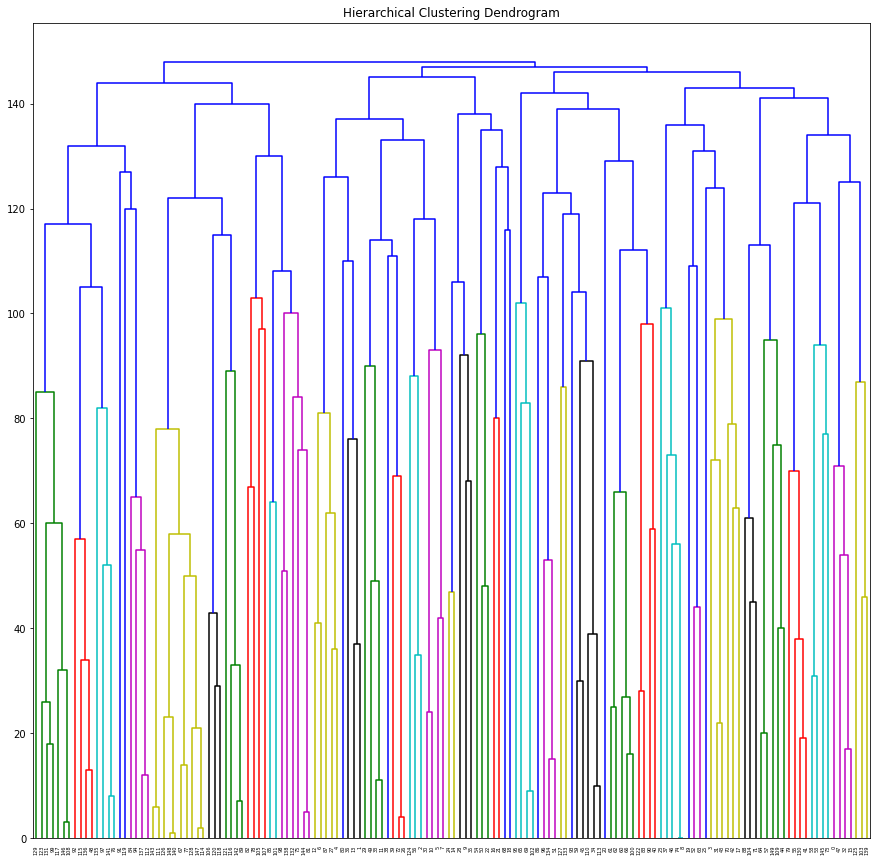

In [ ]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Versión con AgglomerativeClustering de Scikit Learn
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()

X = iris['data']
y = iris['target']

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.figure(figsize=(15, 15))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

La idea es la siguiente: tomamos la clase `AgglomerativeClustering` que realiza todos los cálculos para armar el dendrograma. Sin embargo tenemos que graficarlo con una función propia, ya que Scikit Learn no nos ayuda con esto. Vamos a repetir esto para menos _samples_ y así este gráfico sea más legible.

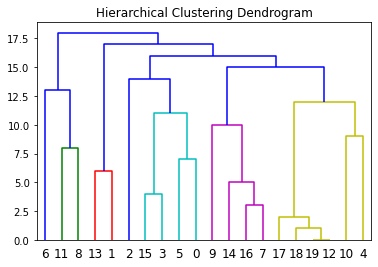

In [ ]:
X = iris['data'][0:20,2:]
y = iris['target']

# Señalamos que no queremos un número fijo de clusters
# distance_threshold 0 es para que no haga merge de hojas en clusters (y las identifiquemos individualmente)
model = AgglomerativeClustering(distance_threshold=0, affinity='euclidean', n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# Los labels corresponden a la fila en la que está la instancia
plot_dendrogram(model, labels=model.labels_)
plt.show()

Como vemos, Scikit Learn calcula la similaridad de forma diferente, pero nos ofrece la opción de definir un número de _clusters_ y encontrarlos usando esta técnica. Aquí vamos a hacer un ejemplo para hacer _clustering_, en donde etiquetamos las hojas del dendrograma con el número de _cluster_.

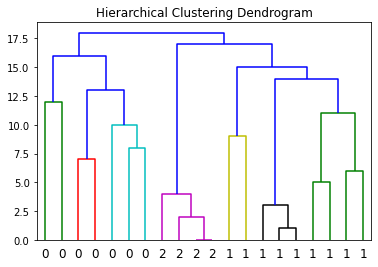

In [ ]:
# Vamos a tomar las flores según el largo y ancho del pétalo
X = iris['data'][0:20,:]
y = iris['target']

# Aquí hay un ejemplo en el que queremos clusters, que son señalados en las etiquetas
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# Los labels corresponden a la fila en la que está la instancia
plot_dendrogram(model, labels=model.labels_)
plt.show()